In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Segunda parte
data_ej1: pd.DataFrame = pd.read_csv('ejercicio_1.csv', sep=',')
x_index: pd.Index = data_ej1.keys()[0]
y_index: pd.Index = data_ej1.keys()[1]

x: pd.DataFrame = data_ej1[x_index]
y: pd.DataFrame = data_ej1[y_index]

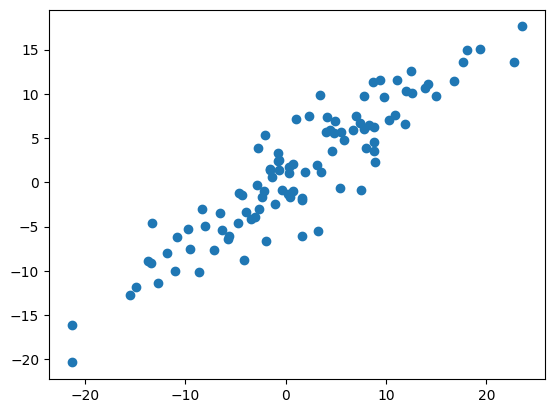

In [6]:
# 1. a)
plt.scatter(x,y)
plt.show()

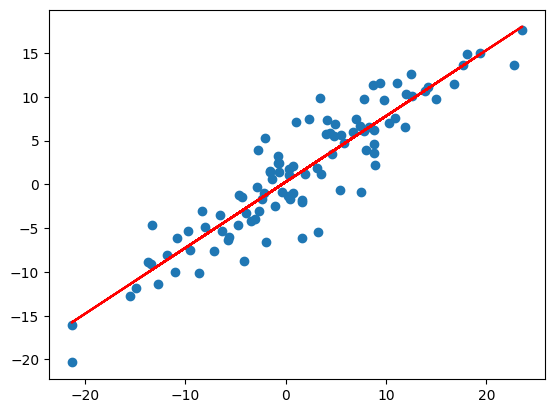

In [7]:
# 1. b)
# Beta* = ((X^t.X)^-1).X^t.y
X = np.array([np.ones(len(x)),x]).T
Y = np.array([y]).T
Xt = np.transpose(X)
Xt_X = np.dot(np.transpose(X),X)
Xt_X_inv = np.linalg.inv(Xt_X)
B_est = np.dot(Xt_X_inv,np.dot(Xt,Y))
plt.scatter(x,y)
plt.plot(x, B_est[0] + B_est[1]*x, color = 'red')
plt.show()

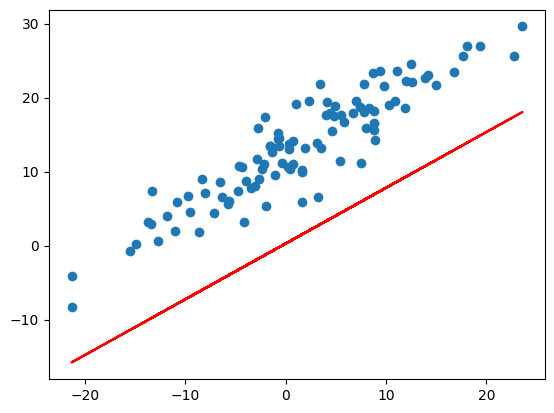

In [8]:
# 1. c)
plt.scatter(x,y+12)
plt.plot(x, B_est[0] + B_est[1]*x, color = 'red')
plt.show()

Si bien la pendiente de la recta es bastante buena, la aproximación no es buena dado que la ordenada al origen aleja a la recta de los puntos.

1. d) Para poder aproximar cualquier recta en el plano es necesario tener en cuenta las ordenadas al origen, es decir, tener un $\beta_0$. Para ello puede agregarse una columna de todos unos (1) a la matriz $X$

In [9]:
# 2. a)
data_ej2: pd.DataFrame = pd.read_csv('ejercicio_2.csv', sep=',')
x2_index: pd.Index = data_ej2.keys()[0]
y2_index: pd.Index = data_ej2.keys()[1]

x2: pd.DataFrame = data_ej2[x2_index]
y2: pd.DataFrame = data_ej2[y2_index]

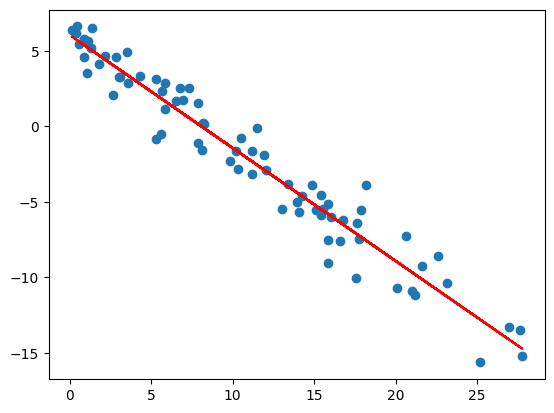

In [10]:
X2 = np.array([np.ones(len(x2)),x2]).T
Y2 = np.array([y2]).T
Xt2 = np.transpose(X2)
Xt_X2 = np.dot(np.transpose(X2),X2)
Xt_X_inv2 = np.linalg.inv(Xt_X2)
B_est2 = np.dot(Xt_X_inv2,np.dot(Xt2,Y2))
plt.scatter(x2,y2)
plt.plot(x2, B_est2[0] + B_est2[1]*x2, color = 'red')
plt.show()

2. b) Si bien la aproximación realizada fue buena, si los datos en un futuro no siguen una tendencia lineal decreciente como la del modelo, las estimaciones pueden ser muy malas, pudiendo arrojar estimaciones sin sentido.

In [4]:
# Tercera Parte
# 1. a)
data_ej3: pd.DataFrame = pd.read_csv('ejercicio_3.csv')
entrenamiento = data_ej3.loc[0:314]
test = data_ej3.loc[315:413]
completo = data_ej3.loc[0:413]

# X1:
x_1: pd.DataFrame = entrenamiento['X1 transaction date']
x_1 = np.array(x_1)

# X2:
x_2: pd.DataFrame = entrenamiento['X2 house age']
x_2 = np.array(x_2)

# X3:
x_3: pd.DataFrame = entrenamiento['X3 distance to the nearest MRT station']
x_3 = np.array(x_3)

# X4:
x_4: pd.DataFrame = entrenamiento['X4 number of convenience stores']
x_4 = np.array(x_4)

# X5:
x_5: pd.DataFrame = entrenamiento['X5 latitude']
x_5 = np.array(x_5)

# X6:
x_6: pd.DataFrame = entrenamiento['X6 longitude']
x_6 = np.array(x_6)

X = np.array([np.ones(len(x_1)),x_1,x_2,x_3,x_4,x_5,x_6]).T

y = np.array([entrenamiento['Y house price of unit area']]).T

X_t = np.transpose(X)
Xt_X = np.dot(X_t,X)
Xt_X_inv = np.linalg.inv(Xt_X)

Betas = np.dot(Xt_X_inv,np.dot(X_t,y)) # Fórmula de solución óptima al problema de regresión
print(Betas)

[[-1.48729497e+04]
 [ 4.96257520e+00]
 [-2.79853534e-01]
 [-4.29360377e-03]
 [ 1.11451659e+00]
 [ 2.63780783e+02]
 [-1.36639228e+01]]


In [5]:
# 1. b)
y_sombrero = Betas[0] + x_1*Betas[1] + x_2*Betas[2] + x_3*Betas[3] + x_4*Betas[4] + x_5*Betas[5] + x_6*Betas[6]
print(y_sombrero)

[47.44123654 48.18652238 49.49007832 49.07818458 46.71288686 31.51438826
 38.93429502 47.16517576  9.39728895 34.98835597 33.66120419 53.23865801
 40.77286468 27.15066559 46.61933013 38.4379727  51.17679341 37.57651279
 46.56141246 47.62066252 35.5687559  49.65985033 28.50344312 48.11429163
 34.86591889 32.40043042 46.82006022 41.62339779 42.91267397 46.05743097
 13.30283598 41.0408349  30.77241439 46.70763273 47.68642762 35.74344241
 30.72997171 30.49969147 44.72414248 46.35831034 14.26448928 16.29638493
 36.11581003 40.79466748 47.98152148 39.56577633 46.65882293 37.57005567
 12.62385104  9.61139541 41.93778789 23.43382594 35.09654245 41.51269611
 45.96943937 22.6991012  43.25750932 45.50127733 13.49335238 40.27477813
 34.2058714  50.65001326 29.91959907 48.00950683 33.12853848 43.46926881
 47.03940868 46.96314056 43.432366   45.99202974 54.39534575 35.20070949
 45.0586487  15.03726863 53.38281293 32.06827295 38.08950042 28.59194718
 33.02389544 27.69278813 45.02296057 37.54607947 45

In [6]:
# 1. c)
y_somb_vec = np.array([y_sombrero]).T
ecm = np.sum((y - y_somb_vec)**2) / len(y)
print(ecm)

83.1655190181993


In [7]:
# 2. a) Repetimos lo realizado en el entrenamiento pero con el conjunto de test
# X1:
x_1t: pd.DataFrame = test['X1 transaction date']
x_1t = np.array(x_1t)

# X2:
x_2t: pd.DataFrame = test['X2 house age']
x_2t = np.array(x_2t)

# X3:
x_3t: pd.DataFrame = test['X3 distance to the nearest MRT station']
x_3t = np.array(x_3t)

# X4:
x_4t: pd.DataFrame = test['X4 number of convenience stores']
x_4t = np.array(x_4t)

# X5:
x_5t: pd.DataFrame = test['X5 latitude']
x_5t = np.array(x_5t)

# X6:
x_6t: pd.DataFrame = test['X6 longitude']
x_6t = np.array(x_6t)

Xt = np.array([np.ones(len(x_1t)),x_1t,x_2t,x_3t,x_4t,x_5t,x_6t]).T

yt = np.array([test['Y house price of unit area']]).T

yt_sombrero = Betas[0] + x_1t*Betas[1] + x_2t*Betas[2] + x_3t*Betas[3] + x_4t*Betas[4] + x_5t*Betas[5] + x_6t*Betas[6]

yt_somb_vec = np.array([yt_sombrero]).T
ecm_test = np.sum((yt - yt_somb_vec)**2) / len(yt)
print(ecm_test)

58.66453979612838


El Error Cuadrático Medio es menor por lo que la estimación es mejor. Esta discrepancia se debe a que la diferencia entre los datos de test y los datos de entrenamiento es menor.

In [13]:
# 2. b) Repetimos lo realizado en el entrenamiento pero con el conjunto completo
# X1:
xc_1: pd.DataFrame = completo['X1 transaction date']
xc_1 = np.array(xc_1)

# X2:
xc_2: pd.DataFrame = completo['X2 house age']
xc_2 = np.array(xc_2)

# X3:
xc_3: pd.DataFrame = completo['X3 distance to the nearest MRT station']
xc_3 = np.array(xc_3)

# X4:
xc_4: pd.DataFrame = completo['X4 number of convenience stores']
xc_4 = np.array(xc_4)

# X5:
xc_5: pd.DataFrame = completo['X5 latitude']
xc_5 = np.array(xc_5)

# X6:
xc_6: pd.DataFrame = completo['X6 longitude']
xc_6 = np.array(xc_6)

Xc = np.array([np.ones(len(xc_1)),xc_1,xc_2,xc_3,xc_4,xc_5,xc_6]).T

yc = np.array([completo['Y house price of unit area']]).T

Xc_t = np.transpose(Xc)
Xct_Xc = np.dot(Xc_t,Xc)
Xct_Xc_inv = np.linalg.inv(Xct_Xc)

Betas_c = np.dot(Xct_Xc_inv,np.dot(Xc_t,yc))

yt_c_sombrero = Betas_c[0] + x_1t*Betas_c[1] + x_2t*Betas_c[2] + x_3t*Betas_c[3] + x_4t*Betas_c[4] + x_5t*Betas_c[5] + x_6t*Betas_c[6]

yt_c_somb_vec = np.array([yt_c_sombrero]).T
ecm_c = np.sum((yt - yt_c_somb_vec)**2) / len(yt)
print(ecm_c)

57.39189675669628


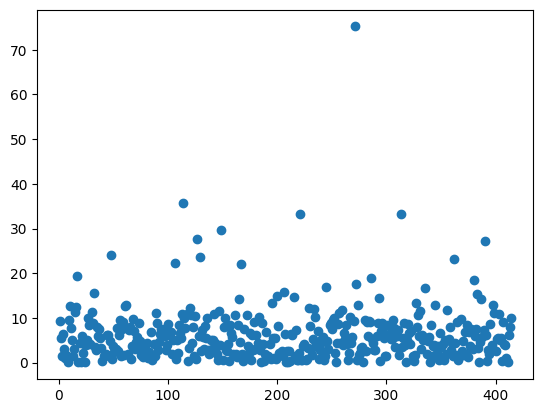

In [15]:
# 3.
yc_sombrero = Betas_c[0] + xc_1*Betas_c[1] + xc_2*Betas_c[2] + xc_3*Betas_c[3] + xc_4*Betas_c[4] + xc_5*Betas_c[5] + xc_6*Betas_c[6]
yc_sombrero = yc_sombrero.reshape(-1, 1)
error_cometido = (yc - yc_sombrero)
n_casas = np.array([completo['No']]).T
plt.scatter(n_casas, abs(error_cometido))
plt.show()

4. Agregar una columna que informe el año en que cada casa fue construida no dismnuiría el ECM ya que no aporta información nueva. Esta información es la misma que la que provee la variable X2 house age, es decir, la edad de la casa.